In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:/Users/5263315/OneDrive - FEMSA Comercio/Daniel Yañez/ITESM/MLOps/')

In [3]:
pd.set_option('display.max_columns', False)

In [4]:
df = pd.read_csv('Absenteeism_at_work.csv', sep=';')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [5]:
df.shape

(740, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

Tenemos un dataframe con 740 registros y 21 columnas (19 variables independientes, un identificador y la variable dependiente).

Adicional, no tenemos registros nulos en las variables.

**Diccionario para variables categoricas**
- Day of the week: Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6)
- Disciplinary failure (yes = 1, No = 0)
- Education: High school (1), graduate (2), postgraduate (3), master and doctor (4)
- Social drinker (yes=1, no=0)
- Social smoker (yes=1, no=0)

### Análisis de datos

Primeramente podemos observar que ciertos datos son categoricos pero ya han sido transformados a variables enteras.

Adicional tenemos una variable ID que no aporta información ya que solo es un identificador y no un factor con el cual podamos clasificar al personal.

In [7]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [8]:
# Ajustamos el nombre de la columna para eliminar el espacio inicial

df.rename(columns = {'Work load Average/day ': 'Work load Average/day'}, inplace=True)

In [9]:
# Separamos los conjuntos de datos para crear sus propias visualizaciones y estadisticos segun el tipo de variables

cat_columns = ['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Disciplinary failure', 
               'Education', 'Social drinker', 'Social smoker']

num_columns = ['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age',
               'Work load Average/day', 'Hit target', 'Son', 'Pet', 'Weight', 'Height', 'Body mass index']

target = ['Absenteeism time in hours']

In [10]:
df_num = df[num_columns]
df_cat = df[cat_columns]

for column in df_cat.columns:
    df_cat[column] = df_cat[column].astype(str)

C:\Users\5263315\AppData\Local\Temp\ipykernel_13928\507846376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[column] = df_cat[column].astype(str)
C:\Users\5263315\AppData\Local\Temp\ipykernel_13928\507846376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[column] = df_cat[column].astype(str)
C:\Users\5263315\AppData\Local\Temp\ipykernel_13928\507846376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [11]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884
Hit target,740.0,94.587838,3.779313,81.000,93.000,95.000,97.000,100.000
Son,740.0,1.018919,1.098489,0.000,0.000,1.000,2.000,4.000
Pet,740.0,0.745946,1.318258,0.000,0.000,0.000,1.000,8.000
Weight,740.0,79.035135,12.883211,56.000,69.000,83.000,89.000,108.000
Height,740.0,172.114865,6.034995,163.000,169.000,170.000,172.000,196.000


In [12]:
df_cat.describe().T

,count,unique,top,freq
Reason for absence,740,28,23,149
Month of absence,740,13,3,87
Day of the week,740,5,2,161
Seasons,740,4,4,195
Disciplinary failure,740,2,0,700
Education,740,4,1,611
Social drinker,740,2,1,420
Social smoker,740,2,0,686


c:\Users\5263315\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\5263315\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\5263315\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\5263315\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

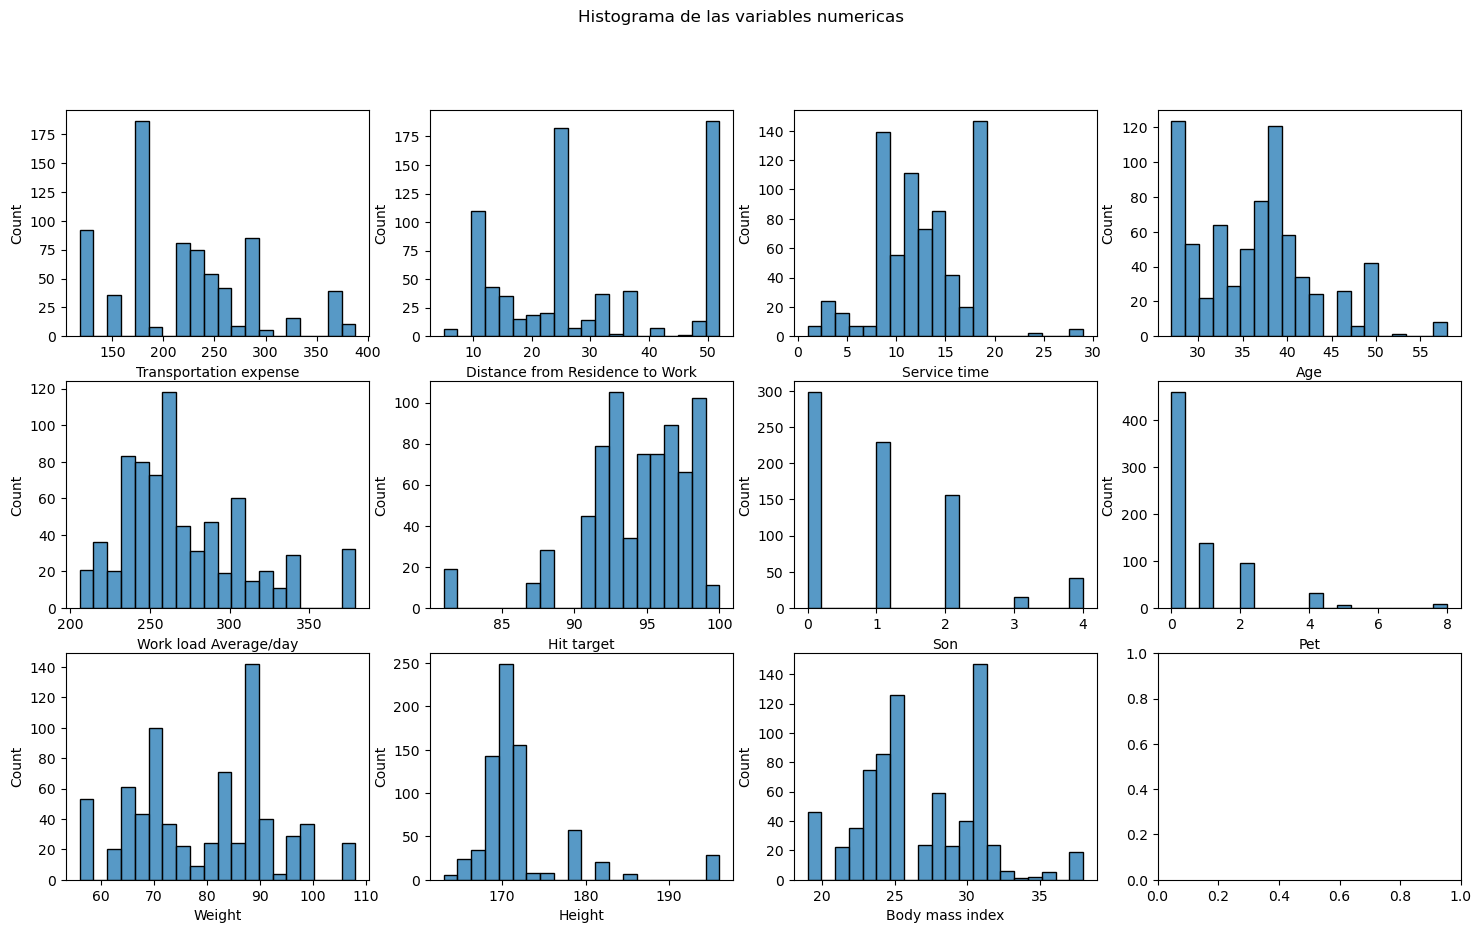

In [13]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(18, 10))
fig.suptitle('Histograma de las variables numericas')

for i in range(0, 3):
    for j in range(0, 4):
        if 4*i+j < len(num_columns):
            sns.histplot(data=df, x=num_columns[4*i+j], bins=20, ax=axes[i, j])

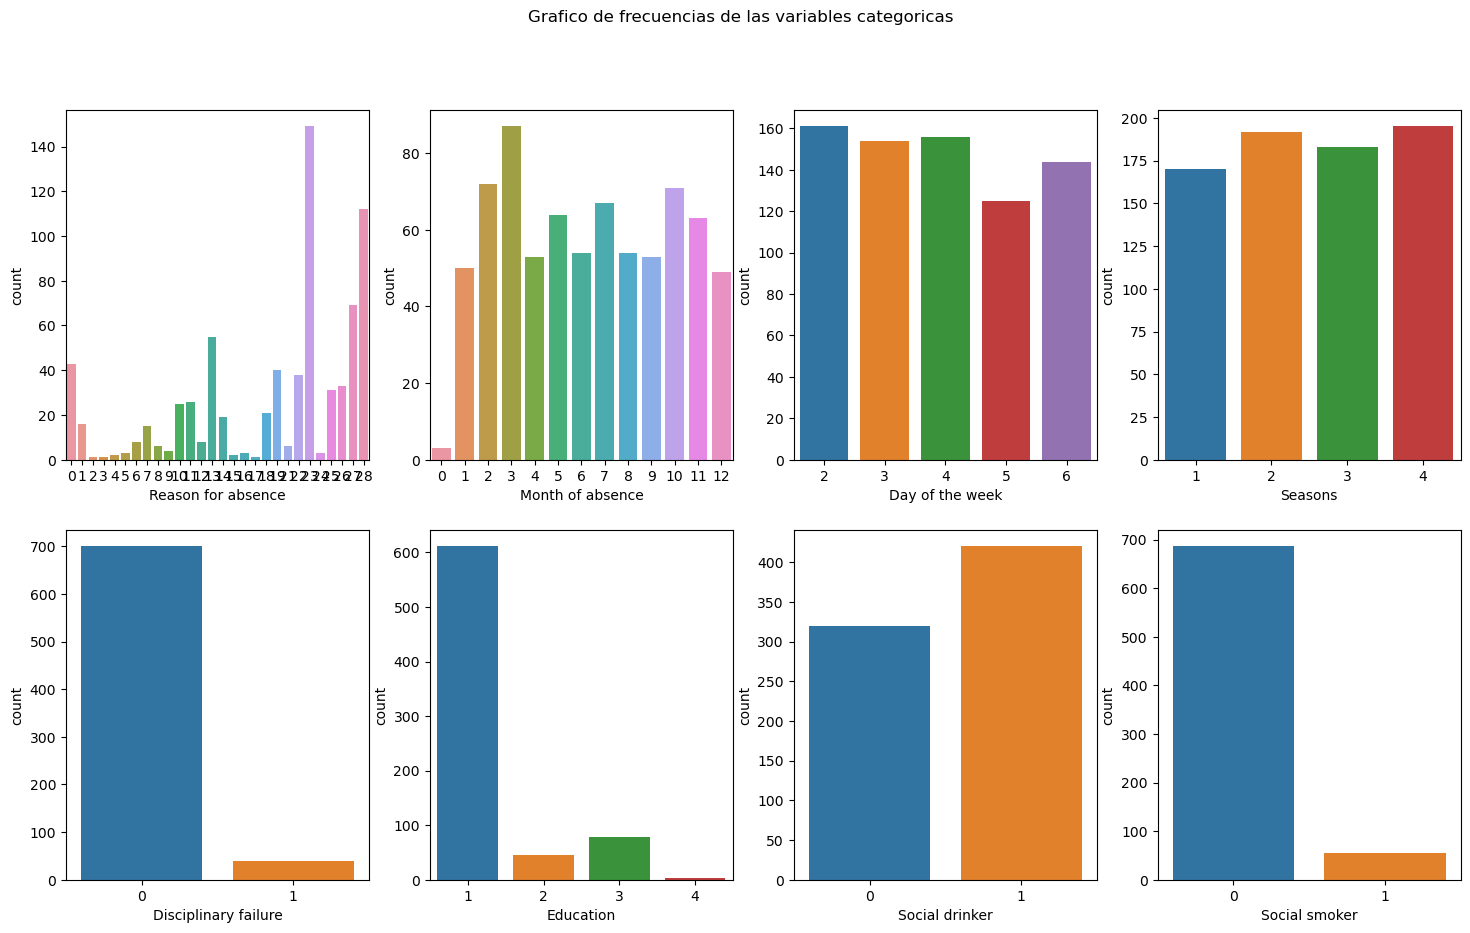

In [14]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(18, 10))
fig.suptitle('Grafico de frecuencias de las variables categoricas')

for i in range(0, 2):
    for j in range(0, 4):
        if 4*i+j < len(cat_columns):
            sns.countplot(data=df, x=cat_columns[4*i+j], ax=axes[i, j])

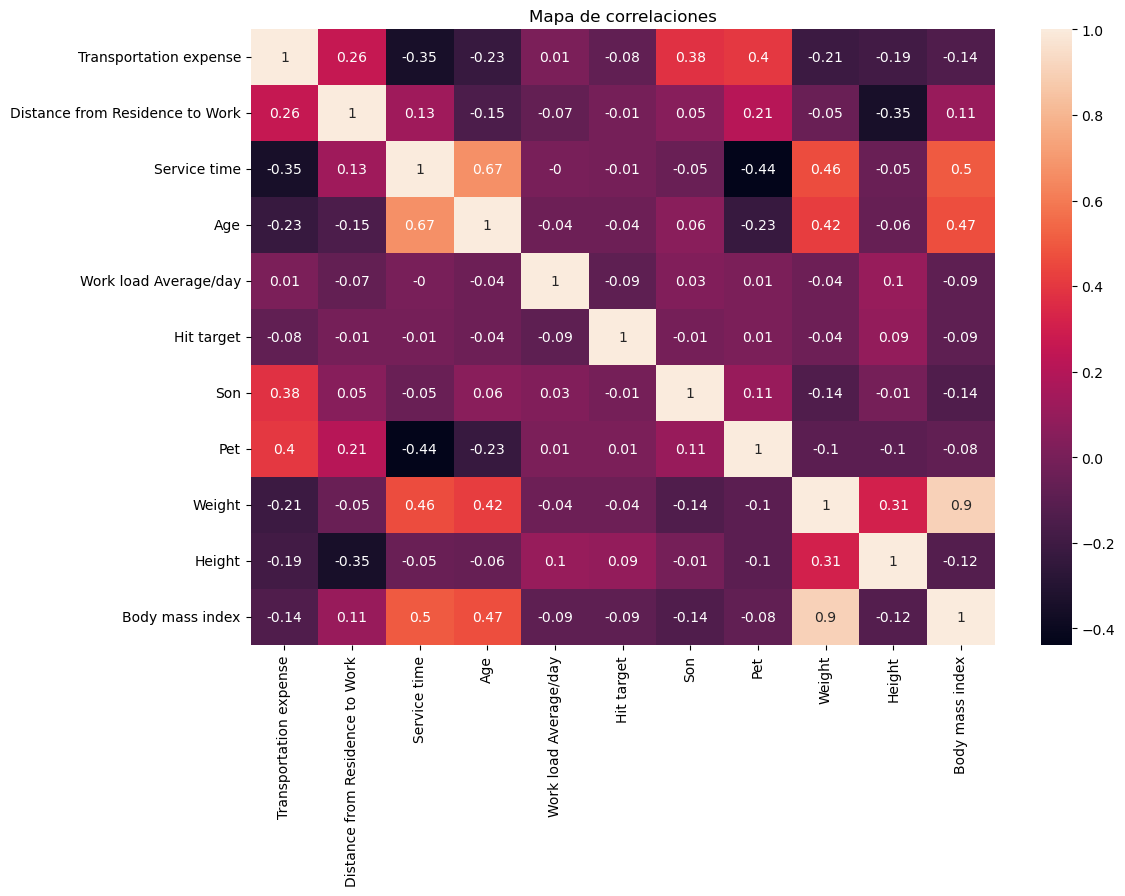

In [15]:
plt.subplots(figsize=(12, 8))
sns.heatmap(np.round(df_num.corr(), 2), annot=True)
plt.title('Mapa de correlaciones')
plt.show()

Realizamos la transformación de la variable de ausentismo de una variable multiclase a una binaria.

In [20]:
df['y'] = np.where(df['Absenteeism time in hours'] <= 0, 1, 0)

# sacar la cota inferior minimo de desempeño
# modelo baseline
# comentar que se probaran diferentes modelos

Tambien eliminaremos la columna de Reason for absence, debido a que es una columna que es diferente de 0 para los causos de ausentismo y para simular el no conocer si la persona se ausento no deberiamos tampoco tener la razon a priori.

In [17]:
df[df['y']][['Reason for absence', 'y']].head()

,Reason for absence,y
1,0,True
50,0,True
51,0,True
54,0,True
55,0,True


In [18]:
df[~df['y']][['Reason for absence', 'y']].head()

,Reason for absence,y
0,26,False
2,23,False
3,7,False
4,23,False
5,23,False


In [19]:
# Como se pudo observar la columna y solo era True cuando la razon es 0 y es False cuando se tiene una razon, 
# lo que causaría un modelo con 100% de clasificación pero no aportaría valor.

df.drop(columns='Reason for absence', inplace=True)

Queremos entender un poco la variable dependiente

- Proporción de datos de la clase positiva y de la negativa.
- Relación con otras variables

In [22]:
df['y'].value_counts(normalize=True)

y
0    0.940541
1    0.059459
Name: proportion, dtype: float64

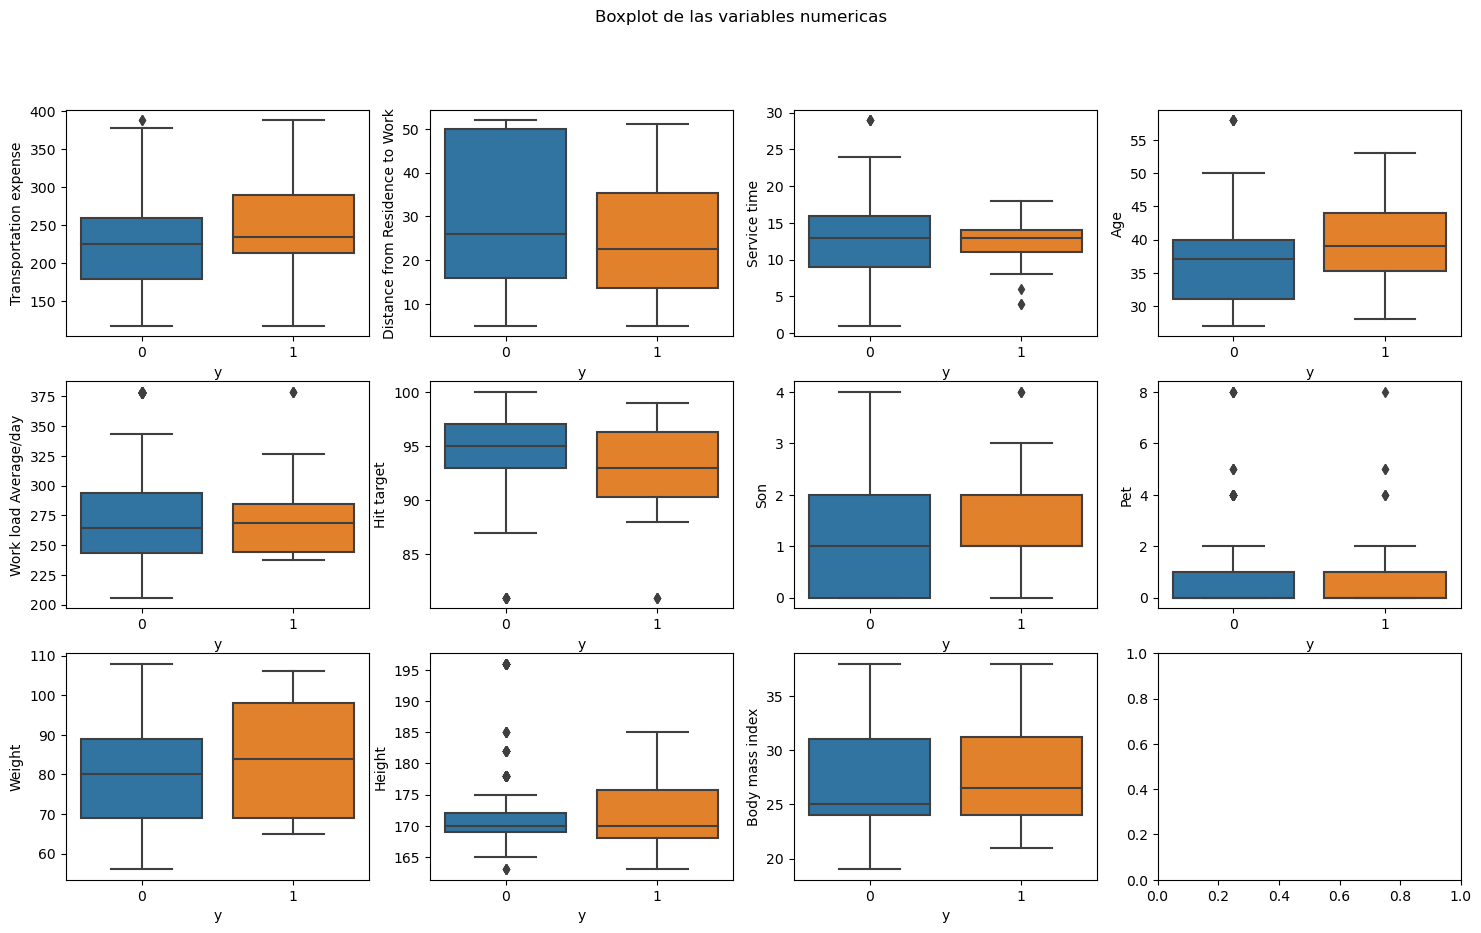

In [24]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(18, 10))
fig.suptitle('Boxplot de las variables numericas')

for i in range(0, 3):
    for j in range(0, 4):
        if 4*i+j < len(num_columns):
            sns.boxplot(data=df, y=num_columns[4*i+j], x='y', ax=axes[i, j])

### Determinar la pregunta que deseas abordar con un modelo de aprendizaje automático

**Pregunta principal**

¿Existe alguna forma de encontrar los empleados que pueden ausentarse en un empleo?

**Preguntas extras**

- ¿Que variables influyen?
- ¿Que precisión podemos llegar a lograr?
- ¿Que es mas importante reducir, la presencia de FN o de FP?


### Identificar por qué se necesita una estrategia de MLOps para este dataset

En este dataset es necesario una estrategia de MLOps debido que queremos realizar una consistencia e integridad de los datos, para poder tener una correcta implementación y asegurar las operaciones del modelo de ML que desarrollemos.

Ademas, realizaremos un proceso completo con el dataset, desde la obtención de los datos, realizar un entrenamiento automatizado, gestión de multiples experimentos entre diferentes modelos con diferentes parametros y asegurar un despliegue eficiente y entregas continuas, por lo cual ante tal situación necesitamos adoptar una cultura de MLOps para poder asegurar una implementación adecuada de versiones y las canalizaciones de datos.

### Diseñar la arquitectura del pipeline para esta nueva iniciativa de aprendizaje automático

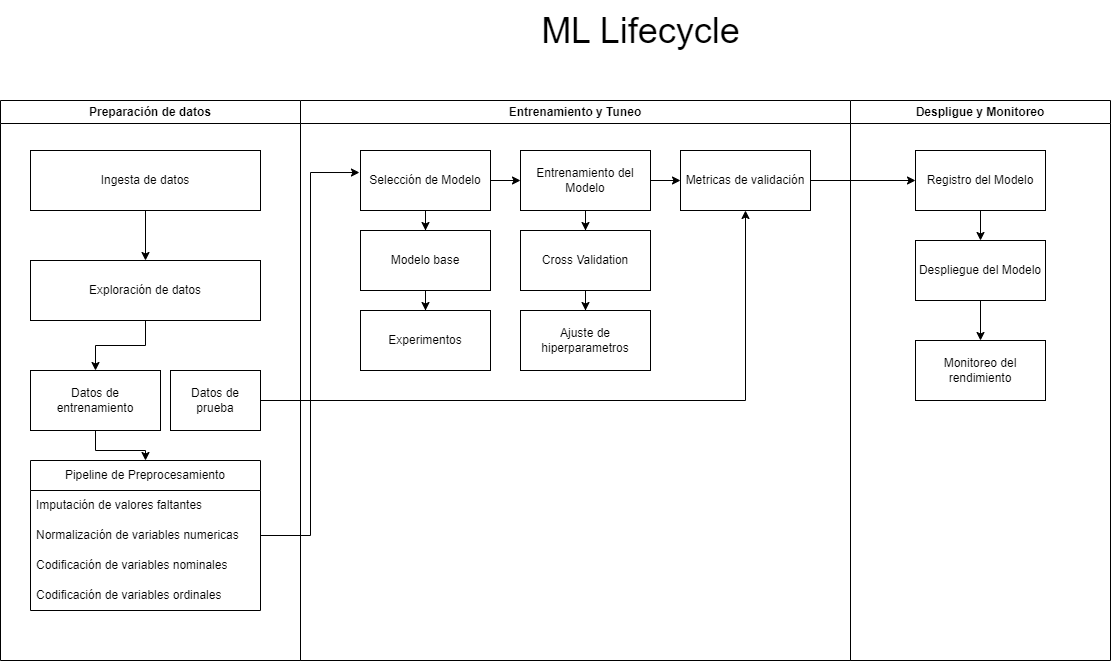

In [25]:
from IPython.display import Image
Image("ML Lifecycle Proyecto.png")

### Diseño de un modelo de datos

In [23]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [24]:
num_pipeline = make_pipeline(SimpleImputer(strategy='median'), MinMaxScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy='mode'), OneHotEncoder(drop='first'))

ord_pipeline = make_pipeline(SimpleImputer(strategy='mode'), LabelBinarizer())

transform = make_column_transformer(
    (num_pipeline, num_columns),
    (cat_pipeline, cat_columns),
    (ord_pipeline), 
    remainder='passthrough'
)

In [25]:
X = df.drop(columns=['Absenteeism time in hours', 'y'])
y = df[['y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=24)

La exactitud en los datos de entrenamiento: 0.9915540540540541
La exactitud en los datos de prueba: 0.9864864864864865


c:\Users\5263315\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


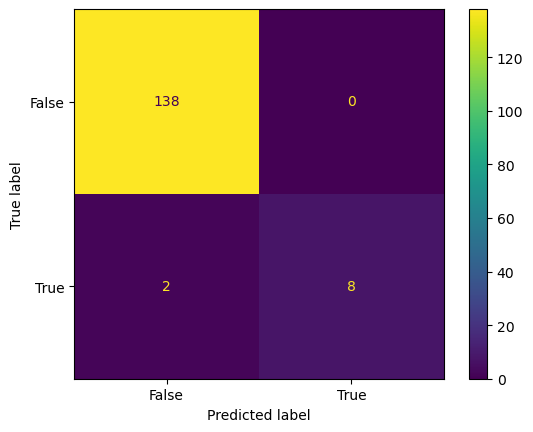

In [26]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)

y_predict_train = log_reg.predict(X_train)
y_predict_test = log_reg.predict(X_test)

print('La exactitud en los datos de entrenamiento: {}'.format(accuracy_score(y_train, y_predict_train)))
print('La exactitud en los datos de prueba: {}'.format(accuracy_score(y_test, y_predict_test)))

cm = confusion_matrix(y_test, y_predict_test, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()